# Data Preparation

In [143]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [144]:
#load the Flights_raw data
df = pd.read_excel(r'C:\Users\amin\Downloads\sg_air_quality_2019 (1).xlsx')

Exratct the variables : o3,so2,pm10,co and pm25

In [145]:
l1=[]
for i in range(len(df['Specie'])):
    if df['Specie'].iloc[i]=='o3':
        l1.append(df['median'].iloc[i])
l2=[]        
for i in range(len(df['Specie'])):        
    if df['Specie'].iloc[i]=='so2':
        l2.append(df['median'].iloc[i])          
l3=[]        
for i in range(len(df['Specie'])):        
    if df['Specie'].iloc[i]=='pm10':
        l3.append(df['median'].iloc[i])
l4=[]
for i in range(len(df['Specie'])):        
    if df['Specie'].iloc[i]=='co':
        l4.append(df['median'].iloc[i])
l5=[]
for i in range(len(df['Specie'])):        
    if df['Specie'].iloc[i]=='pm25':
        l5.append(df['median'].iloc[i])        

In [146]:
DATA = pd.DataFrame({'o3':  l1,'so2': l2,'pm10':l3,'co':l4,'pm25':l5},index=pd.date_range('2019-06-13', periods=len(l5)))


In [147]:
#load the Flights_raw data
dff = pd.read_excel(r'C:\Users\amin\Downloads\Flights_raw.xlsx')
dff = dff.head(len(l5))


In [148]:
DATA['infected']=dff['total_cases']
DATA['Group']=dff['Group']
for i in range(len(dff['total_cases'])):
    DATA['infected'].iloc[i]= dff['total_cases'].iloc[i]
    DATA['Group'].iloc[i]= dff['Group'].iloc[i]
    
    

In [131]:
#drop a column 'Group'
dt = DATA.drop(columns="Group")


#  Data Modelling

In [132]:
#standarisation
from sklearn import preprocessing
X_scaled = preprocessing.scale(dt)

In [133]:
dataset = pd.DataFrame({'o3': X_scaled[:, 0], 'so2': X_scaled[:, 1],'pm10': X_scaled[:, 2],'co': X_scaled[:, 3],'pm25': X_scaled[:, 4],'total_cases': X_scaled[:, 5]})
 

In [149]:
dataset['Category']=DATA['Group']
for i in range(len(DATA['Group'])):
    dataset['Category'].iloc[i]=DATA['Group'].iloc[i]


In [150]:
from statsmodels.multivariate.manova import MANOVA
maov = MANOVA.from_formula('o3 + so2 +pm10+co +pm25 ~ Category', data=dataset)
print(maov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9221 5.0000 372.0000  6.2844 0.0000
         Pillai's trace 0.0779 5.0000 372.0000  6.2844 0.0000
 Hotelling-Lawley trace 0.0845 5.0000 372.0000  6.2844 0.0000
    Roy's greatest root 0.0845 5.0000 372.0000  6.2844 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        Category        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9134 5.0000 372.0000  7.0517 0.0000
         Pillai's trace 0.0866 5.0000 372.0000  7.0517 0.0000
 Hotelling-Lawley trace 0.

# Charts and Graphs

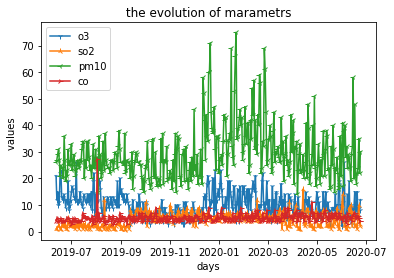

In [151]:
#show the evolution of marametrs 

plt.plot(dt.index,dt['o3'],marker='1', markerfacecolor='blue',label="o3")
plt.plot(dt.index,dt['so2'],marker='2',label="so2")
plt.plot(dt.index,dt['pm10'],marker='3',label="pm10")
plt.plot(dt.index,dt['co'],marker='4',label="co")
plt.title(' the evolution of marametrs ')
plt.xlabel('days')
plt.ylabel('values ')
plt.legend()

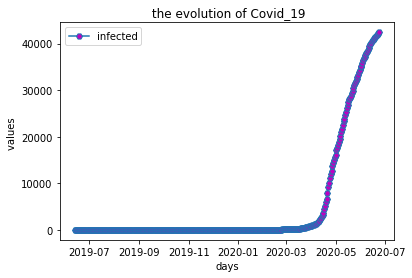

In [152]:
#show the evolution of Covid_19
plt.plot(dt.index,dt['infected'],marker='H', markerfacecolor='m',label="infected")
plt.xlabel('days')
plt.ylabel('values ')
plt.title(' the evolution of Covid_19')
plt.legend()
